def get_gis_data():
curr_date = datetime.now()
formatted_date = curr_date.strftime("%Y-%m-%d")
data = {  
 'date': f'{formatted_date}',
'map_type': 'NDWI', # NDVI, AVI, NDWI, OSAVI, VARI, RGB, dem, ortho
'map_info': json.dumps({
"version": 0, # always 0
"satellite": "S2A" # 'S2A', 'LC8', 'LC9', 'S2B', 'PLA'
}),
'metrics': json.dumps({"avg_value": 32,
"variability": [0.8353, 56.0, 98.0],
"distribution": [{"area": 0.0019, "value": 1}, {"area": 0.0001, "value": 2},
{"area": 0.0001, "value": 3}, {"area": 0.0002, "value": 4},
{"area": 0.0001, "value": 5}, {"area": 0.0001, "value": 6},
{"area": 0.0001, "value": 7}, {"area": 0.0001, "value": 8},
{"area": 0.0004, "value": 10}, {"area": 0.0004, "value": 11},
{"area": 0.0002, "value": 12}, {"area": 0.0003, "value": 13},
{"area": 0.0009, "value": 14}, {"area": 0.0007, "value": 15},
{"area": 0.0019, "value": 16}, {"area": 0.0017, "value": 17},
{"area": 0.0022, "value": 18}, {"area": 0.0029, "value": 19},
{"area": 0.0047, "value": 20}, {"area": 0.005, "value": 21},
{"area": 0.0115, "value": 22}, {"area": 0.0084, "value": 23},
{"area": 0.0171, "value": 24}, {"area": 0.014, "value": 25},
{"area": 0.0286, "value": 26}, {"area": 0.0243, "value": 27},
{"area": 0.0487, "value": 28}, {"area": 0.0464, "value": 29},
{"area": 0.0878, "value": 30}, {"area": 0.0704, "value": 31},
{"area": 0.1255, "value": 32}, {"area": 0.0872, "value": 33},
{"area": 0.1243, "value": 34}, {"area": 0.0681, "value": 35},
{"area": 0.0772, "value": 36}, {"area": 0.0392, "value": 37},
{"area": 0.0478, "value": 38}, {"area": 0.0241, "value": 39},
{"area": 0.0195, "value": 40}, {"area": 0.0025, "value": 41},
{"area": 0.0026, "value": 42}, {"area": 0.0005, "value": 43}],
"cloud_coverage": 0.0})}
return data


def get_test_data_for_image_upload():
data = {
'date': '2023-07-14',
'context': json.dumps({
"field_id": 80254
}),
'map_type': 'NDWI', # NDVI, AVI, NDWI, OSAVI, VARI, RGB, dem, ortho
'map_info': json.dumps({
"version": 0, # always 0
"satellite": "S2A" # 'S2A', 'LC8', 'LC9', 'S2B', 'PLA'
}),
'metrics': json.dumps({"avg_value": 32,
"variability": [0.8353, 56.0, 98.0],
"distribution": [{"area": 0.0019, "value": 1}, {"area": 0.0001, "value": 2},
{"area": 0.0001, "value": 3}, {"area": 0.0002, "value": 4},
{"area": 0.0001, "value": 5}, {"area": 0.0001, "value": 6},
{"area": 0.0001, "value": 7}, {"area": 0.0001, "value": 8},
{"area": 0.0004, "value": 10}, {"area": 0.0004, "value": 11},
{"area": 0.0002, "value": 12}, {"area": 0.0003, "value": 13},
{"area": 0.0009, "value": 14}, {"area": 0.0007, "value": 15},
{"area": 0.0019, "value": 16}, {"area": 0.0017, "value": 17},
{"area": 0.0022, "value": 18}, {"area": 0.0029, "value": 19},
{"area": 0.0047, "value": 20}, {"area": 0.005, "value": 21},
{"area": 0.0115, "value": 22}, {"area": 0.0084, "value": 23},
{"area": 0.0171, "value": 24}, {"area": 0.014, "value": 25},
{"area": 0.0286, "value": 26}, {"area": 0.0243, "value": 27},
{"area": 0.0487, "value": 28}, {"area": 0.0464, "value": 29},
{"area": 0.0878, "value": 30}, {"area": 0.0704, "value": 31},
{"area": 0.1255, "value": 32}, {"area": 0.0872, "value": 33},
{"area": 0.1243, "value": 34}, {"area": 0.0681, "value": 35},
{"area": 0.0772, "value": 36}, {"area": 0.0392, "value": 37},
{"area": 0.0478, "value": 38}, {"area": 0.0241, "value": 39},
{"area": 0.0195, "value": 40}, {"area": 0.0025, "value": 41},
{"area": 0.0026, "value": 42}, {"area": 0.0005, "value": 43}],
"cloud_coverage": 0.0}),
'shape': json.dumps({"type": "MultiPolygon",
"coordinates": [[[[28.390278, 49.980344], [28.390432, 49.980412],
                                               [28.390697, 49.980473], [28.390951, 49.980477],
                                               [28.391287, 49.980454], [28.39144, 49.98045],
                                               [28.391493, 49.980386], [28.391505, 49.980257],
                                               [28.391446, 49.980131], [28.391393, 49.980037],
                                               [28.391263, 49.979908], [28.391145, 49.979786],
                                               [28.39108, 49.979691], [28.391063, 49.979604],
                                               [28.391104, 49.979525], [28.391287, 49.979449],
                                               [28.391824, 49.979392], [28.392166, 49.979377],
                                               [28.392325, 49.979388], [28.392478, 49.979441],
                                               [28.392909, 49.979506], [28.392974, 49.979528],
                                               [28.393174, 49.97954], [28.393428, 49.979597],
                                               [28.393658, 49.979642], [28.393959, 49.97971],
                                               [28.394142, 49.979733], [28.394301, 49.979707],
                                               [28.394584, 49.979597], [28.39505, 49.979377],
                                               [28.395381, 49.979202], [28.395805, 49.979054],
                                               [28.396236, 49.978929], [28.396607, 49.978861],
                                               [28.397032, 49.978808], [28.397127, 49.978773],
                                               [28.397268, 49.978694], [28.397386, 49.978663],
                                               [28.397569, 49.978656], [28.397758, 49.97869],
                                               [28.398159, 49.978766], [28.398495, 49.978834],
                                               [28.398749, 49.978861], [28.399085, 49.978883],
                                               [28.399433, 49.978883], [28.399746, 49.978872],
                                               [28.399964, 49.978846], [28.400129, 49.978849],
                                               [28.400253, 49.978902], [28.400424, 49.978956],
                                               [28.400318, 49.978956], [28.400259, 49.978975],
                                               [28.40017, 49.979062], [28.399928, 49.979232],
                                               [28.399728, 49.979407], [28.399504, 49.979559],
                                               [28.399268, 49.97971], [28.399091, 49.979775],
                                               [28.398943, 49.979798], [28.398666, 49.979817],
                                               [28.398377, 49.979828], [28.398123, 49.97987],
                                               [28.397876, 49.9799], [28.397569, 49.979942],
                                               [28.397374, 49.979968], [28.397127, 49.979995],
                                               [28.39692, 49.979987], [28.396661, 49.979987],
                                               [28.396431, 49.97998], [28.396307, 49.979968],
                                               [28.395788, 49.979987], [28.395481, 49.980006],
                                               [28.39528, 49.980006], [28.395156, 49.979999],
                                               [28.394985, 49.979972], [28.394873, 49.979953],
                                               [28.394791, 49.97998], [28.394808, 49.980033],
                                               [28.394897, 49.980059], [28.39508, 49.980075],
                                               [28.395198, 49.980086], [28.395528, 49.980059],
                                               [28.396047, 49.980075], [28.396442, 49.98004],
                                               [28.396873, 49.98004], [28.397191, 49.980037],
                                               [28.397433, 49.98004], [28.398177, 49.979965],
                                               [28.398625, 49.979927], [28.398949, 49.979908],
                                               [28.399274, 49.979866], [28.399421, 49.979874],
                                               [28.399598, 49.979866], [28.399869, 49.979832],
                                               [28.400005, 49.97979], [28.400212, 49.979764],
                                               [28.400329, 49.979741], [28.400324, 49.979691],
                                               [28.400253, 49.979661], [28.400058, 49.97968],
                                               [28.399917, 49.979684], [28.399787, 49.979669],
                                               [28.399687, 49.979635], [28.399687, 49.979566],
                                               [28.399734, 49.979521], [28.399964, 49.979373],
                                               [28.400064, 49.979301], [28.400235, 49.979214],
                                               [28.400341, 49.97913], [28.400518, 49.979012],
                                               [28.400731, 49.978891], [28.400872, 49.978857],
                                               [28.401155, 49.978804], [28.401415, 49.97877],
                                               [28.401668, 49.978773], [28.401893, 49.978796],
                                               [28.402046, 49.978887], [28.402052, 49.979005],
                                               [28.402017, 49.97913], [28.401987, 49.979198],
                                               [28.401899, 49.979297], [28.40158, 49.979585],
                                               [28.40135, 49.97982], [28.401161, 49.980052],
                                               [28.400972, 49.980279], [28.400872, 49.980382],
                                               [28.400725, 49.980534], [28.400666, 49.980659],
                                               [28.400678, 49.980894], [28.400678, 49.981068],
                                               [28.400713, 49.981262], [28.400748, 49.981516],
                                               [28.400613, 49.981649], [28.400495, 49.981759],
                                               [28.400365, 49.981812], [28.400294, 49.981891],
                                               [28.400223, 49.982073], [28.400135, 49.982229],
                                               [28.399893, 49.982426], [28.39974, 49.982544],
                                               [28.399651, 49.982635], [28.399628, 49.982707],
                                               [28.399681, 49.982828], [28.39974, 49.982874],
                                               [28.4002, 49.982897], [28.400595, 49.982919],
                                               [28.400878, 49.98298], [28.400961, 49.983098],
                                               [28.401055, 49.983291], [28.401208, 49.983568],
                                               [28.401326, 49.983758], [28.401303, 49.983822],
                                               [28.40122, 49.983803], [28.400276, 49.984209],
                                               [28.398265, 49.985074], [28.39797, 49.985203],
                                               [28.39761, 49.985362], [28.394932, 49.986462],
                                               [28.39334, 49.987118], [28.391275, 49.987964],
                                               [28.390367, 49.988331], [28.389747, 49.988567],
                                               [28.389511, 49.988639], [28.389447, 49.988589],
                                               [28.389382, 49.988483], [28.389104, 49.988244],
                                               [28.388922, 49.988077], [28.388857, 49.987983],
                                               [28.388786, 49.987937], [28.388538, 49.987702],
                                               [28.388108, 49.987368], [28.388013, 49.98727],
                                               [28.387954, 49.987239], [28.387807, 49.987171],
                                               [28.387553, 49.987023], [28.387282, 49.986905],
                                               [28.38678, 49.986735], [28.38648, 49.986621],
                                               [28.386149, 49.986534], [28.385754, 49.986382],
                                               [28.385459, 49.986253], [28.385205, 49.986151],
                                               [28.384852, 49.985893], [28.38461, 49.985658],
                                               [28.384415, 49.985445], [28.384285, 49.985286],
                                               [28.38425, 49.985146], [28.384256, 49.985058],
                                               [28.384374, 49.984967], [28.384975, 49.984675],
                                               [28.385335, 49.984527], [28.385489, 49.984463],
                                               [28.38566, 49.984421], [28.385831, 49.984345],
                                               [28.385978, 49.984258], [28.386078, 49.984216],
                                               [28.386196, 49.984213], [28.386238, 49.984129],
                                               [28.386308, 49.984095], [28.386362, 49.984106],
                                               [28.386444, 49.984023], [28.38694, 49.983845],
                                               [28.387235, 49.983723], [28.387488, 49.983636],
                                               [28.387883, 49.983481], [28.387972, 49.983447],
                                               [28.38809, 49.983462], [28.388149, 49.983458],
                                               [28.388167, 49.983405], [28.388178, 49.983355],
                                               [28.388408, 49.983219], [28.388892, 49.982832],
                                               [28.389317, 49.982464], [28.38947, 49.982316],
                                               [28.389724, 49.98196], [28.389948, 49.981554],
                                               [28.390036, 49.98125], [28.390066, 49.980943],
                                               [28.390084, 49.980689], [28.390148, 49.980534],
                                               [28.390172, 49.980408], [28.390213, 49.980348],
                                               [28.390278, 49.980344]]]]})
}
return data


In [51]:
import requests
import json


from datetime import datetime


def get_test_data_for_image_upload():
    current_date = datetime.now()
    formatted_date = current_date.strftime("%Y-%m-%d")
    data = {
        'date': f'{formatted_date}',
        'context': json.dumps({
            "field_id": 80254
        }),
        'map_type': 'NDWI',  # NDVI, AVI, NDWI, OSAVI, VARI, RGB, dem, ortho
        'map_info': json.dumps({
            "version": 0,  # always 0
            "satellite": "S2A"  # 'S2A', 'LC8', 'LC9', 'S2B', 'PLA'
        }),
        'metrics': json.dumps({"avg_value": 32,
                               "variability": [0.8353, 56.0, 98.0],
                               "distribution": [{"area": 0.0019, "value": 1}, {"area": 0.0001, "value": 2},
                                                {"area": 0.0001, "value": 3}, {"area": 0.0002, "value": 4},
                                                {"area": 0.0001, "value": 5}, {"area": 0.0001, "value": 6},
                                                {"area": 0.0001, "value": 7}, {"area": 0.0001, "value": 8},
                                                {"area": 0.0004, "value": 10}, {"area": 0.0004, "value": 11},
                                                {"area": 0.0002, "value": 12}, {"area": 0.0003, "value": 13},
                                                {"area": 0.0009, "value": 14}, {"area": 0.0007, "value": 15},
                                                {"area": 0.0019, "value": 16}, {"area": 0.0017, "value": 17},
                                                {"area": 0.0022, "value": 18}, {"area": 0.0029, "value": 19},
                                                {"area": 0.0047, "value": 20}, {"area": 0.005, "value": 21},
                                                {"area": 0.0115, "value": 22}, {"area": 0.0084, "value": 23},
                                                {"area": 0.0171, "value": 24}, {"area": 0.014, "value": 25},
                                                {"area": 0.0286, "value": 26}, {"area": 0.0243, "value": 27},
                                                {"area": 0.0487, "value": 28}, {"area": 0.0464, "value": 29},
                                                {"area": 0.0878, "value": 30}, {"area": 0.0704, "value": 31},
                                                {"area": 0.1255, "value": 32}, {"area": 0.0872, "value": 33},
                                                {"area": 0.1243, "value": 34}, {"area": 0.0681, "value": 35},
                                                {"area": 0.0772, "value": 36}, {"area": 0.0392, "value": 37},
                                                {"area": 0.0478, "value": 38}, {"area": 0.0241, "value": 39},
                                                {"area": 0.0195, "value": 40}, {"area": 0.0025, "value": 41},
                                                {"area": 0.0026, "value": 42}, {"area": 0.0005, "value": 43}],
                               "cloud_coverage": 0.0}),
        'shape': json.dumps({"type":"MultiPolygon",
                             "coordinates":[[[[69.08629420027304,53.20677083662315],[69.14580185975453,53.217738557925856],[69.15952407451243,53.198836373874485],[69.0960969485192,53.18696117408754],[69.08629420027304,53.20677083662315]]]]})
    }
    return data




In [38]:


print(get_test_data_for_image_upload().get("map_info"))


{'version': 0, 'satellite': 'S2A'}


In [39]:
print(get_test_data_for_image_upload().get("context"))

{"field_id": 80254}


In [35]:
print(get_test_data_for_image_upload().get("map_info"))#without json dumps

{'version': 0, 'satellite': 'S2A'}


In [52]:
BASE_URL = 'https://dev1.agroonline.kz/api'  # FOR EU


# BASE_URL = 'https://api.on-track.ai/api' # FOR KZ

def get_token(login, password):
    # URL для аутентификации
    auth_url = f"{BASE_URL}/auth/token/"

    # Данные для отправки в POST-запросе для аутентификации
    auth_data = {
        "email": login,
        "password": password,
        "remember": True
    }

    # Заголовки для запроса аутентификации
    auth_headers = {
        "content-type": "application/json",
    }

    # Отправляем POST-запрос для аутентификации
    response = requests.post(auth_url, json=auth_data, headers=auth_headers)

    # Получаем токены из ответа
    tokens = response.json()
    access_token = tokens['access']
    
    return access_token





def upload_image(access_token, company_id, data, file_path):
    url = f"{BASE_URL}/company/{company_id}/maps/satellites/upload/"
    # Заголовки для запроса
    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    # Отправляем POST-запрос
    files = {'file': open(file_path, 'rb')}
    response = requests.post(url, headers=headers, data=data, files=files)
    # Проверяем результат
    if response.status_code == 201:
        print("Данные успешно загружены")
        print(response.json())
    else:
        print("Ошибка загрузки данных:", response.status_code, response.text)


def test():
    LOGIN = 'intern@on-track.ai'
    PASSWORD = 'Intern123'
    COMPANY_ID = "1093"  # ID компании

    token = get_token(LOGIN, PASSWORD)
    # test fields
    file_path = "C:/Users/Asilk/Desktop/work/14072023_59158r2_NDWI_P20190125_S2A.png"
    
    # ревизий больше нет, есть только текущая форма поля
    upload_image(token, COMPANY_ID, get_test_data_for_image_upload(), file_path)




In [53]:
test()

Данные успешно загружены
{'id': 9631621, 'title': None, 'date': '2024-06-04', 'path_to_file': '14072023_59158r2_NDWI_P20190125_S2A.png', 'context': {'field_id': 80254}, 'map_type': 'NDWI', 'map_source': 'satellite', 'map_info': {'version': 0, 'satellite': 'S2A'}, 'metrics': {'avg_value': 32, 'variability': [0.8353, 56.0, 98.0], 'distribution': [{'area': 0.0019, 'value': 1}, {'area': 0.0001, 'value': 2}, {'area': 0.0001, 'value': 3}, {'area': 0.0002, 'value': 4}, {'area': 0.0001, 'value': 5}, {'area': 0.0001, 'value': 6}, {'area': 0.0001, 'value': 7}, {'area': 0.0001, 'value': 8}, {'area': 0.0004, 'value': 10}, {'area': 0.0004, 'value': 11}, {'area': 0.0002, 'value': 12}, {'area': 0.0003, 'value': 13}, {'area': 0.0009, 'value': 14}, {'area': 0.0007, 'value': 15}, {'area': 0.0019, 'value': 16}, {'area': 0.0017, 'value': 17}, {'area': 0.0022, 'value': 18}, {'area': 0.0029, 'value': 19}, {'area': 0.0047, 'value': 20}, {'area': 0.005, 'value': 21}, {'area': 0.0115, 'value': 22}, {'area': 0.

  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


c:\Users\Asilk\anaconda3\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Image Shape: (152, 271)
Image Data Type: uint8


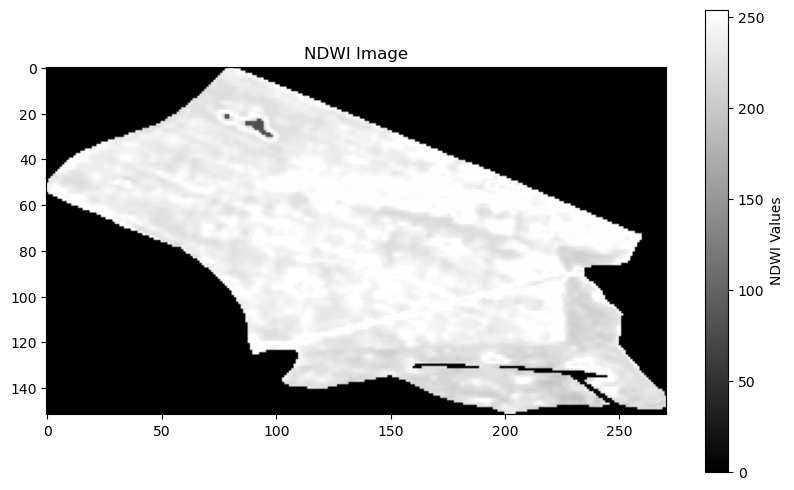

Average NDWI Value: 126.3778646339095
NDWI Min Value: 0
NDWI Max Value: 254
NDWI Standard Deviation: 119.20691644514267
Histogram: [19318     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0    41     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Path to the uploaded image
image_path = "../../../14072023_59158r2_NDWI_P20190125_S2A.PNG"

# Read the image using rasterio
with rasterio.open(image_path) as src:
    image = src.read(1)  # Read the first band

# Display basic info about the image
print(f"Image Shape: {image.shape}")
print(f"Image Data Type: {image.dtype}")

# Display the image using matplotlib
plt.figure(figsize=(10, 6))
plt.title("NDWI Image")
plt.imshow(image, cmap='gray')
plt.colorbar(label='NDWI Values')
plt.show()

# Calculate average value
average_value = np.mean(image)
print(f"Average NDWI Value: {average_value}")

# Calculate variability (min, max, std)
min_value = np.min(image)
max_value = np.max(image)
std_deviation = np.std(image)
print(f"NDWI Min Value: {min_value}")
print(f"NDWI Max Value: {max_value}")
print(f"NDWI Standard Deviation: {std_deviation}")

# Histogram for distribution analysis
hist, bins_center = exposure.histogram(image)
print(f"Histogram: {hist}")

# Normalize the histogram to show area percentages
hist_normalized = hist / hist.sum()
distribution = [{"area": hist_normalized[i], "value": bins_center[i]} for i in range(len(hist))]
print(f"Distribution: {distribution}")

# If needed, calculate cloud coverage (assuming a threshold method, e.g., very high reflectance)
cloud_coverage_threshold = 200  # This value depends on the specific image and needs adjustment
cloud_coverage = np.sum(image > cloud_coverage_threshold) / image.size
print(f"Estimated Cloud Coverage: {cloud_coverage * 100:.2f}%")
